In [1]:
# Author: Shaheen Naiyer
# Date 16092022
# snshohin@gmail.com
# https://github.com/vthz

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Analysis

# (Objective 0): Cleaning Data

In [3]:
# Reading data set file
dataset=pd.read_csv("Iris.csv")

In [4]:
# Checking first 5 rows of dataset
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.set_index("Id",inplace=True)  # For avoiding operations on ID column
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Checking dataset shape
print(dataset.shape)

# Dataset contains 150 records and 5 columns out of which 5th column is "Label"

(150, 5)


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
# 4 columns with Numerical data and One column with Categorical data.
# All 4 Attributes contains 150 records of type float64

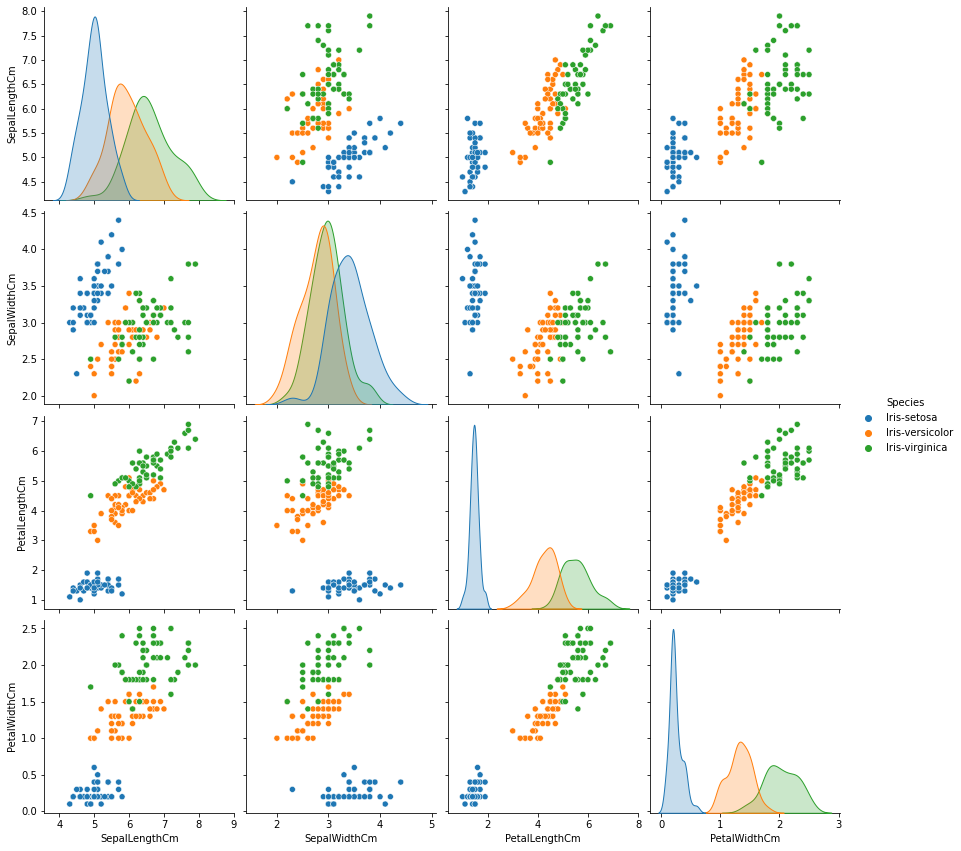

In [9]:
sns.pairplot(dataset,hue="Species",height=3) 

# (Result): 
### Features columns are having proper values of the proper dataset and non of them are missing. Additionally, we can confirm there are no outliers in the sample by visually examining the pair plot. As a result, the dataset doesn't need to be cleaned.

In [10]:
dataset.describe().style.background_gradient()  # Describing various attributes
# Count of each column is 150, hence no missing values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
dataset.nunique().sort_values()

Species           3
PetalWidthCm     22
SepalWidthCm     23
SepalLengthCm    35
PetalLengthCm    43
dtype: int64

## (Objective 1):Checking for NULL or Missing values

In [12]:
dataset.isnull().sum() 
# Total count of NULL values = 0

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
print((dataset.isnull().sum()/len(dataset))*100) # missing value percentage

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64


In [14]:
dataset.isnull().any() 
# Non of the column contains any NULL value

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

<AxesSubplot:>

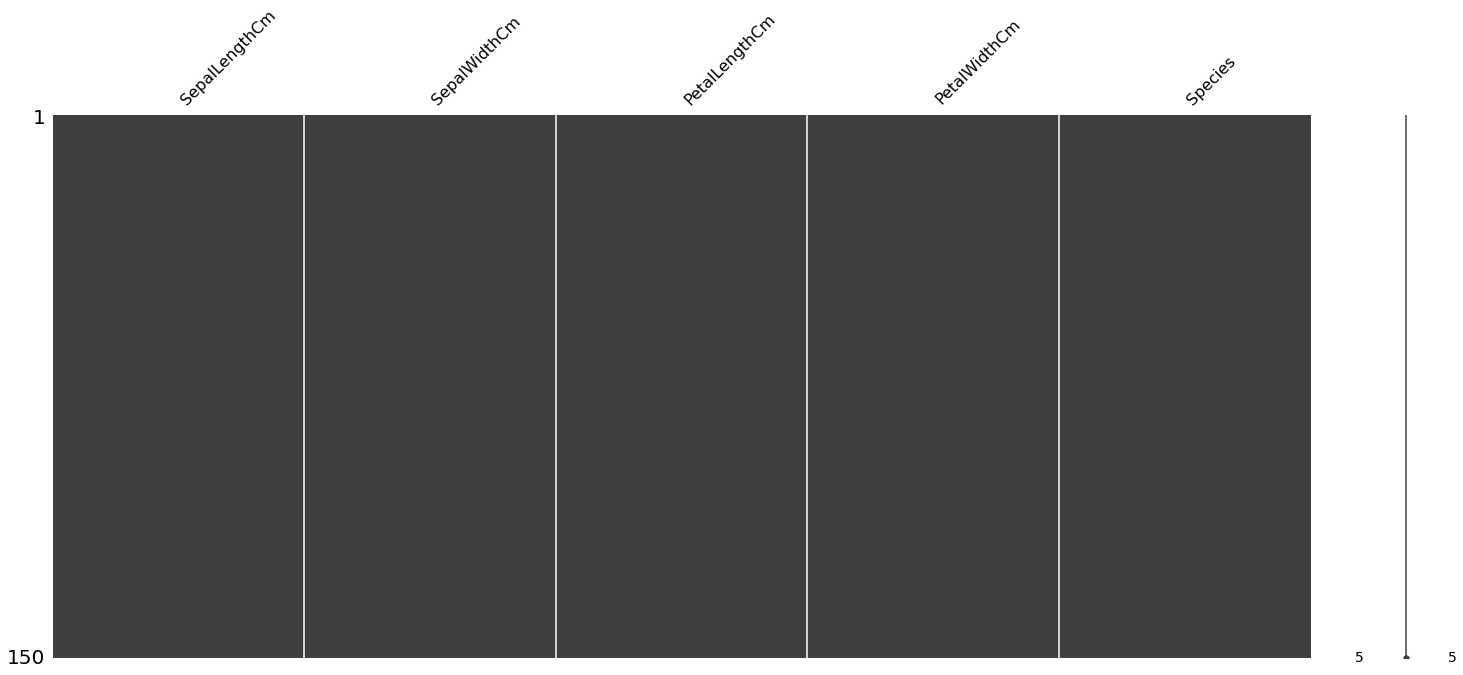

In [15]:
# Visualizing missing values
import missingno as msno
msno.matrix(dataset)

# (Result):
### Using "isnull()" we observed that there are no NULLs in the Features columns. Additionally, we can observe solid color blocks in each of the feature columns after plotting the dataset with the missingno library, indicating that there are no NULL or missing values.

In [16]:
# sns.heatmap(dataset.isnull(),yticklabels=False,annot=True)
# since this heatmap is perfect it means there are no NULL values

# (Objective 2):Check if dataset is balanced or not

In [17]:
# Counting each species
dataset["Species"].value_counts()
# We can see that all species contain an equal number of rows.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [18]:
# Percentage of each species
dataset["Species"].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

<AxesSubplot:xlabel='Species', ylabel='count'>

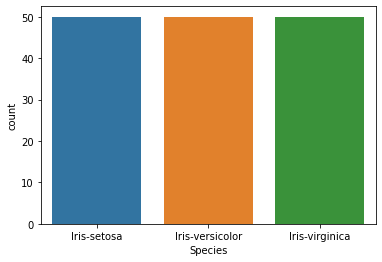

In [19]:
sns.countplot(x="Species",data=dataset)


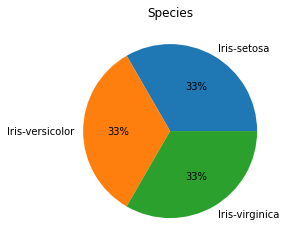

In [20]:
species_pie=pd.crosstab(index=dataset['Species'],columns='% observations')
plt.pie(species_pie['% observations'],labels=species_pie['% observations'].index,autopct='%.0f%%')
plt.title('Species')
plt.show()

In [21]:
dataset.Species.unique()
# Only three unique species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
dataset.shape

(150, 5)

## (Result):
### From above analysis, we can be sure that our data contains 150 records distributed over 3 categories equally, thus making our dataset balanced!